In [85]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
df_day = pd.read_csv('E:\\Amrita\\Bike-Sharing-Data-Analysis\\bike-data\\day.csv')

# Display the first few rows of the dataframe
print(df_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [87]:
df_hour = pd.read_csv('E:\\Amrita\\Bike-Sharing-Data-Analysis\\bike-data\\hour.csv')

# Check for missing values in each column
missing_values = df_hour.isnull().sum()

#print(missing_values)

# Convert 'dteday' to datetime with dayfirst=True
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'], dayfirst=True)

# Example: Visualizing with boxplot to detect outliers
#sns.boxplot(x=df_hour['cnt'])

# Create 'month' and 'day_of_week' features
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day_of_week'] = df_hour['dteday'].dt.dayofweek


X = df_hour[['temp', 'atemp', 'hum', 'windspeed', 'month', 'day_of_week']]  # Independent variables
y = df_hour['cnt']  # Dependent variable (number of bike rentals)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with standardization and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First step: Scaling the data
    ('model', LinearRegression())  # Second step: Training the model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# model = LinearRegression()
# model.fit(X_train, y_train)
predictions


array([382.25846126, 131.85062456, 139.88564343, ...,  68.12229754,
       169.72515777, 199.93115872])

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')

ValueError: Found input variables with inconsistent numbers of samples: [13903, 3476]

In [81]:
# Create future dates for the next 3 months
future_dates = pd.date_range(start=df_hour['dteday'].max(), periods=365, freq='D')

future_df = pd.DataFrame({'dteday': future_dates})
future_df['month'] = future_df['dteday'].dt.month

future_df['day_of_week'] = future_df['dteday'].dt.dayofweek



# # Add other necessary features (e.g., forecasted temperature, humidity, etc.)
# # Use mean or forecasted values for the features

future_df['temp'] = df_hour['temp'].mean()  # Example
future_df['hum'] = df_hour['hum'].mean()
future_df['windspeed'] = df_hour['windspeed'].mean()
future_df['atemp'] = df_hour['atemp'].mean()# Example


future_predictions = model.predict(future_df[['temp', 'atemp', 'hum', 'windspeed', 'month', 'day_of_week']])

future_df['predicted_cnt'] = future_predictions
future_df

,dteday,month,day_of_week,temp,hum,windspeed,atemp,predicted_cnt
0,2012-12-31,12,0,0.496987,0.627229,0.190098,0.475775,221.753479
1,2013-01-01,1,1,0.496987,0.627229,0.190098,0.475775,159.544888
2,2013-01-02,1,2,0.496987,0.627229,0.190098,0.475775,159.317798
3,2013-01-03,1,3,0.496987,0.627229,0.190098,0.475775,159.090708
4,2013-01-04,1,4,0.496987,0.627229,0.190098,0.475775,158.863618
...,...,...,...,...,...,...,...,...
360,2013-12-26,12,3,0.496987,0.627229,0.190098,0.475775,221.072208
361,2013-12-27,12,4,0.496987,0.627229,0.190098,0.475775,220.845118
362,2013-12-28,12,5,0.496987,0.627229,0.190098,0.475775,220.618028
363,2013-12-29,12,6,0.496987,0.627229,0.190098,0.475775,220.390938


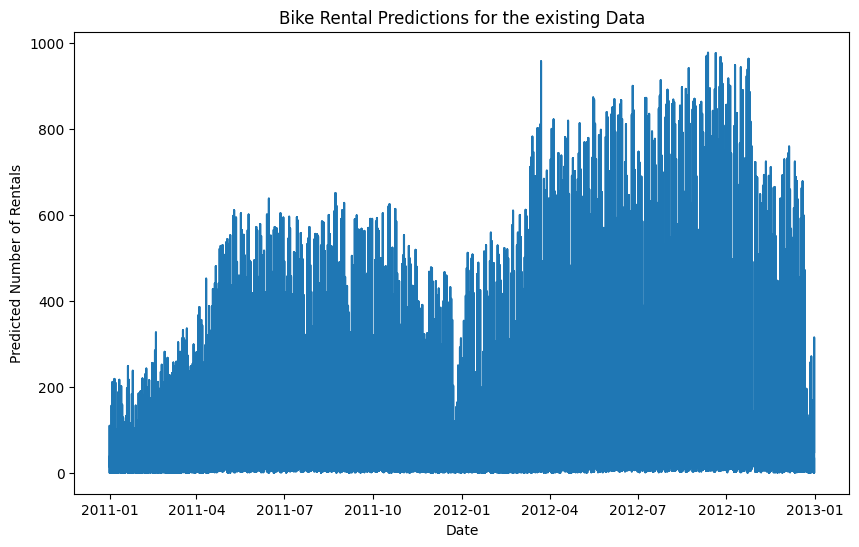

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(df_hour['dteday'], df_hour['cnt'])
plt.xlabel('Date')
plt.ylabel('Predicted Number of Rentals')
plt.title('Bike Rental Predictions for the existing Data')
plt.show()

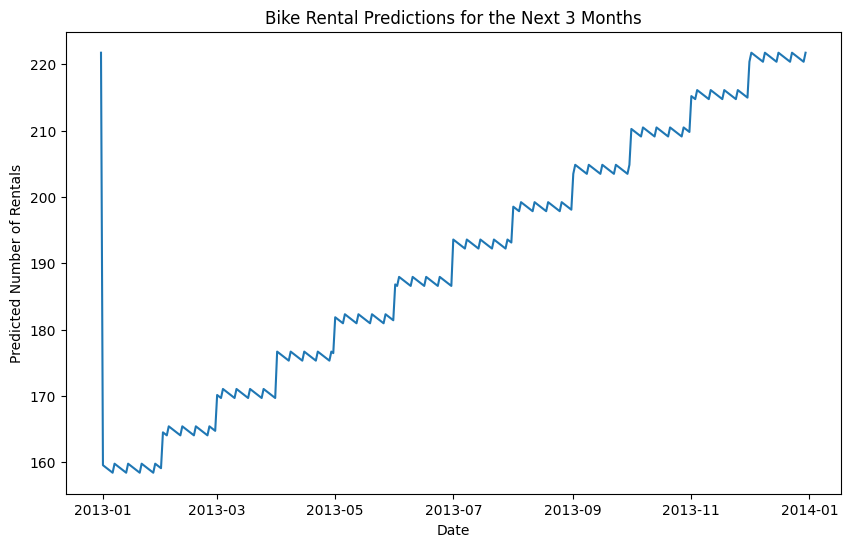

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(future_df['dteday'], future_df['predicted_cnt'])
plt.xlabel('Date')
plt.ylabel('Predicted Number of Rentals')
plt.title('Bike Rental Predictions for the Next 3 Months')
plt.show()